<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/Lin_reg_portland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('portland_housing').sheet1

rows = worksheet.get_all_values()

portland_df = pd.DataFrame.from_records(rows)
new_header = portland_df.iloc[0]
portland_df = portland_df[1:]
portland_df.columns = new_header
portland_df.head()

,Size,Bedrooms,Price
1,2104,3,399900
2,1600,3,329900
3,2400,3,369000
4,1416,2,232000
5,3000,4,539900


In [ ]:
X = portland_df[['Bedrooms', 'Size']]
y = portland_df['Price']

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X, y)

predict_data = np.array([[2,3200], [3,3200]])
prediction = lin_model.predict(predict_data)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([517596.02817454, 508858.00906222])

In [ ]:
model = DecisionTreeRegressor(max_depth=3, min_samples_split=7)
model.fit(X, y)
predict_data = np.array([[3200, 3], [3720, 2]])
model.predict(predict_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([232361.46153846, 232361.46153846])

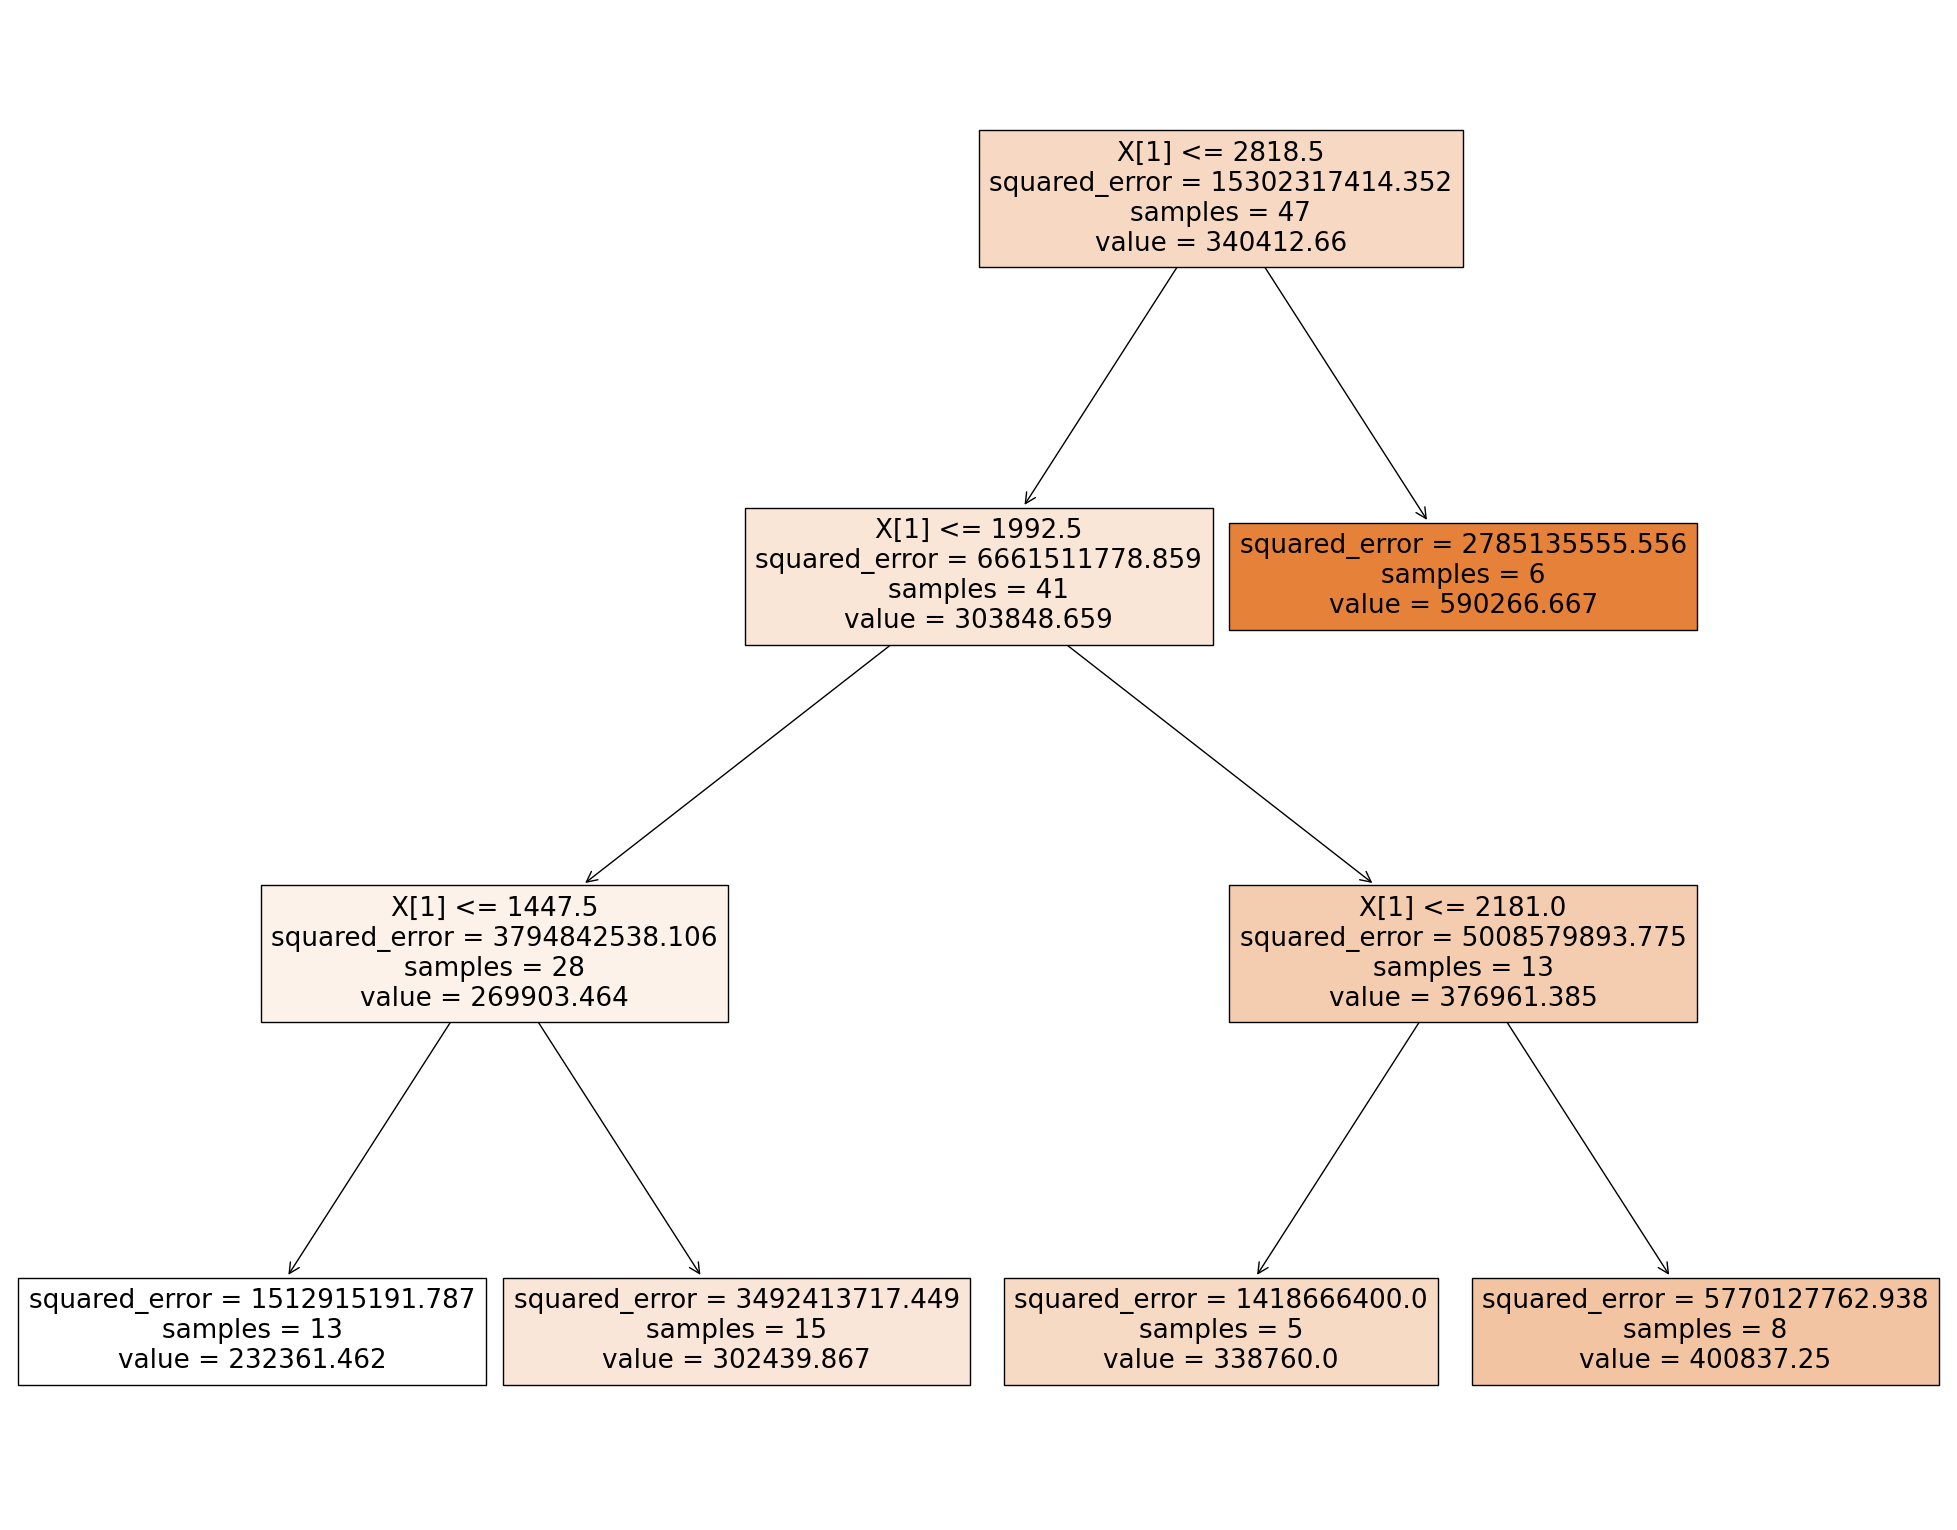

In [ ]:
fig = plt.figure(figsize = (25,20), dpi=100)
_ = tree.plot_tree(model, filled = True, class_names='Example')

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('portland_housing').sheet1

rows = worksheet.get_all_values()

portland_df = pd.DataFrame.from_records(rows)
new_header = portland_df.iloc[0]
portland_df = portland_df[1:]
portland_df.columns = new_header
portland_df.head()

,Size,Bedrooms,Price
1,2104,3,399900
2,1600,3,329900
3,2400,3,369000
4,1416,2,232000
5,3000,4,539900


In [ ]:
X= portland_df[['Size']].astype(None)
y = portland_df['Price'].astype(None)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
my_split = cv.split(X_train, y_train)
my_split

<generator object _BaseKFold.split at 0x7f5f81f22900>

In [ ]:
for train, test in my_split:
  X_train2, y_train2 = X_train.iloc[train], y_train.iloc[train]
  X_test2, y_test2 = X_train.iloc[test], y_train.iloc[test]

(37, 1) <class 'pandas.core.frame.DataFrame'> (37,)
y= b:64811.68 +  a:140.59*x
MAE = 4733204719.251434


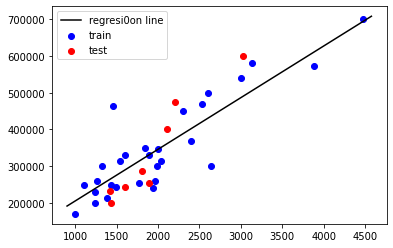

y= b:27517.71 +  a:156.17*x
MAE = 5566403476.246742


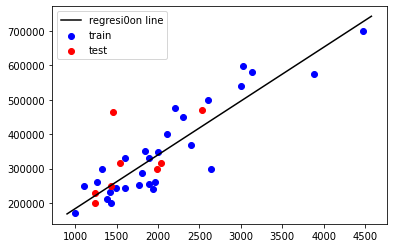

y= b:40590.83 +  a:154.17*x
MAE = 4740133585.39184


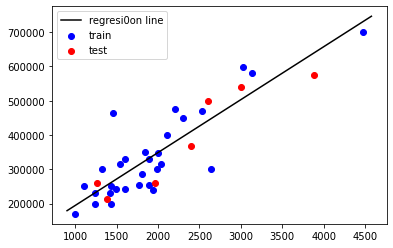

y= b:33932.98 +  a:157.56*x
MAE = 4600565870.344971


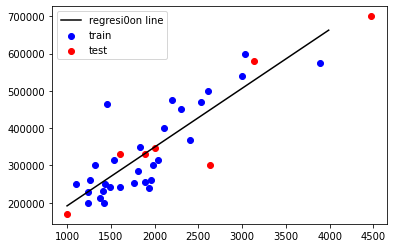

y= b:39845.07 +  a:152.88*x
MAE = 4341509015.739224


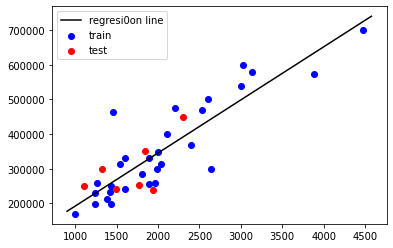

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=6)
my_split = cv.split(X_train, y_train)
my_split
print(X_train.shape,type(X_train),y_train.shape)

predicted = []
target = []

#tutaj array test jest tak naprawdę validacją do prawdziwego testu
for train_index, test_index in my_split:
  LR = LinearRegression()
  # train_index to wybiera indexy z CV
  # X.iloc[train_index] - to daje wiersze dla podanego indexu
  # tworzy zmienne które są seriami danych 
  # X - to cechy z głównego DF
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  # przygotowanie do fitowania
  X_train_cv = np.array(X_train_cv.values.reshape(-1,1))
  X_test_cv = np.array(X_test_cv.values.reshape(-1,1))
  # uczenie modelu (fitowanie)
  LR.fit(X_train_cv, y_train_cv.values)
  # łączy listę predicted z nowymi danymi
  # dodaje do listy kolejne predykcje poszerzając wektor
  predicted = np.concatenate((predicted, LR.predict(X_test_cv)))
  pred_len = len(predicted)
  # tworzy listę target 
  target = np.concatenate((target, y_test_cv))
  #print(predicted,type(target),X_train_cv,len(X_train_cv), pred_len, sep = '\n\n', end= '\n\n')

# to do dokończenia
  plt.figure()
  plt.scatter(X_train_cv, y_train_cv, c='b', label='train')
  plt.scatter(X_test_cv, y_test_cv, c='r', label='test')

  # print(np.linspace(min(X_train_cv)-100
  #                       ,max(X_train_cv)+100,
  #           pred_len),predicted)
  # x_pred_2 = np.linspace(min(X_test_cv)-100
  #                       ,max(X_test_cv)+100,
  #           pred_len).reshape(-1,1)
  # plt.scatter(x_pred_2,LR.predict(x_pred_2), c='green', label='predicted_value')
  x = np.linspace(min(X_train_cv)-100, max(X_train_cv)+100, 100)
  plt.plot(x,LR.predict(x),c='black', label='regresi0on line')
  print(f'y= b:{LR.intercept_:.2f} +  a:{LR.coef_[0]:.2f}*x')
  print(f'MAE = {mean_squared_error(target,predicted)}')
  plt.legend()
  plt.show()